<a href="https://colab.research.google.com/github/vishnuv0007/ICT_Assignments/blob/main/Vishnu_V_Assignment5_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#Question 1. Reding data set to python environment

In [59]:
data=pd.read_excel('/content/iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [60]:
# view basic info in iris data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
data.shape

(150, 5)

In [62]:
data.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [63]:
#print unique values in each col in order to check for any special charecters (?,#, etc)
for col in data.columns:
    print(col,':\n',data[col].unique())

SL :
 [5.1 4.9 nan 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 4.7 5.5 4.5 5.3 7.  6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.4 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SW :
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 nan 4.  4.4 3.8 3.7 3.3 4.1 4.2 2.3 2.8
 2.4 2.7 2.  2.2 2.5 2.6]
PL :
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 nan 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5
 4.2 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 5.3
 5.5 6.7 6.9 5.7 6.1 6.4 5.4 5.2]
PW :
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Classification :
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


It is found that Some null values are present in the data set, but no special characters are there

In [64]:
data.describe()  #view statistical info in the dataset

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
#Question 2: Necessary pre processing steps

In [66]:
#Filling missing values with median
for col in data.columns:
    if data[col].dtype!='object':  # filling with median is done only for numerical columns
        data[col]=data[col].fillna(data[col].median())
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [67]:
data.isnull().sum()  #check whether all null values got filled

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


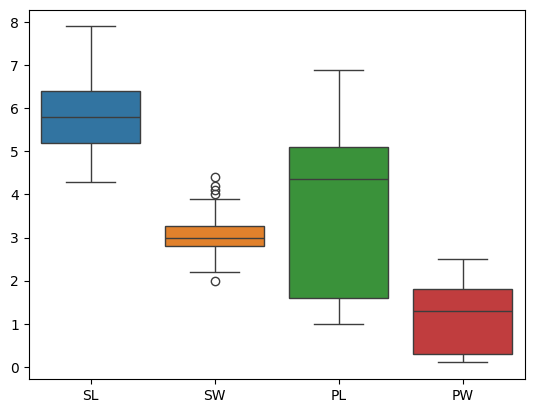

In [68]:
# checking outliers
sns.boxplot(data);

'SW' column is having some outliers, but since they are not very large values, they are not clipped

In [69]:
# Since the target variable is categorical, label encoding is done
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


Somewhat lesser accuracy is obtained when modelling is done with scaled values. Also not much variation is observed in values in different columns. So scaling is not done

In [70]:
#split data to feature(x) and target (y)
x=data.drop('Classification',axis=1)
y=data['Classification']

In [71]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [72]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [73]:
#split data to two: test and train sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [75]:
#Question 3-a : Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
#logit_model=LogisticRegression()
#while doing Logistic Regression, got lbfgs failed to converge warning.
#So, changed number of iterations from default value 100 to 150
logit_model=LogisticRegression(solver='lbfgs', max_iter=150)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))


Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [78]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [79]:
#Question3-b: K Nearest Neighbor algorithm

In [80]:
#this code finds the value of k from 3 to 15 which gives best accuracy and that value of k is used to build knn model
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=4)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

It is found that accuracy is more for k value=8

In [81]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=4)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
y_pred_knn

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [82]:
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_knn,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [83]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [84]:
#Question3-c: Support Vector Machine Algorithm

In [85]:
from sklearn.svm import SVC
sv_clf=SVC()
sv_clf.fit(x_train,y_train)
y_pred_svm=sv_clf.predict(x_test)
y_pred_svm

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [86]:
print('Accuracy is', accuracy_score(y_test, y_pred_svm))
print('Precision is', precision_score(y_test, y_pred_svm,average='micro'))
print('Recall is', recall_score(y_test, y_pred_svm,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_svm,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [87]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [88]:
#Question3-d: Decision Tree algorithm

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred_DT=dt_clf.predict(x_test)
y_pred_DT

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [90]:
print('Accuracy is', accuracy_score(y_test, y_pred_DT))
print('Precision is', precision_score(y_test, y_pred_DT,average='micro'))
print('Recall is', recall_score(y_test, y_pred_DT,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_DT,average='micro'))



Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [91]:
confusion_matrix(y_test,y_pred_DT)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [92]:
#Question3-e: Random Forest algorithm

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred_RF=dt_clf.predict(x_test)
y_pred_RF

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [94]:
print('Accuracy is', accuracy_score(y_test, y_pred_RF))
print('Precision is', precision_score(y_test, y_pred_RF,average='micro'))
print('Recall is', recall_score(y_test, y_pred_RF,average='micro'))
print('f1 score is', f1_score(y_test,y_pred_RF,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [95]:
confusion_matrix(y_test,y_pred_RF)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [96]:
########### Result: After running above 5 classification algorithms, it is found that metric values (accuracy, precision, recall and f1_score) are 1 for all.
###########         This indicates that all the models have learned the iris dataset with 100 % accuracy and can be used to predict any new values accurately

<Axes: xlabel='SL', ylabel='SW'>

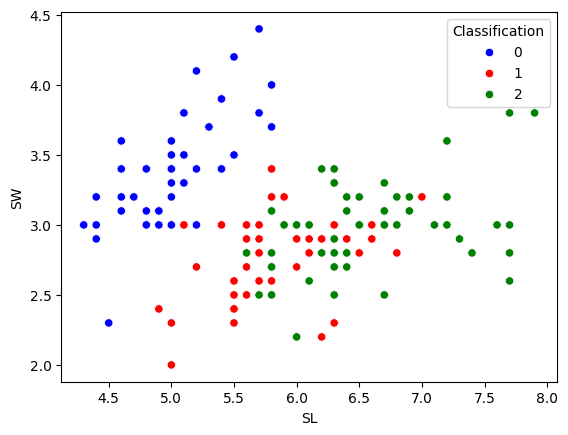

In [97]:
sns.scatterplot(data=data,x='SL',y='SW',hue='Classification',palette=['Blue','Red','Green'])

<Axes: xlabel='PL', ylabel='PW'>

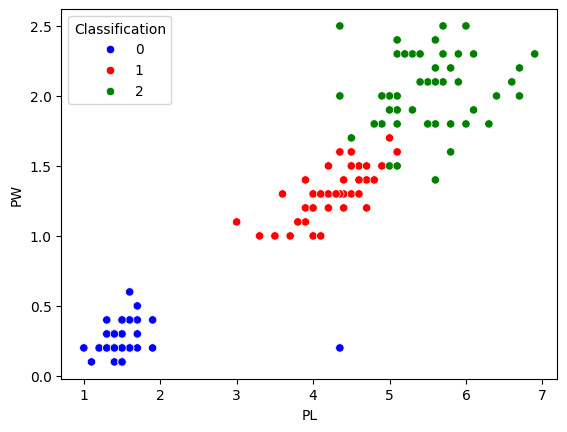

In [98]:
sns.scatterplot(data=data,x='PL',y='PW',hue='Classification',palette=['Blue','Red','Green'])

In [99]:
### From above scatterplot, it is observed that there is observable separation between the PL and PW plot for the three different flower classifications.
### This may be the reason for getting 100% accuracy in the Classification model.